# ***Product Recommendation System***

# Step 0: Load Packages and Libraries

In [3]:
# Importing necessary libraries  
import pandas as pd  # Pandas is used for data manipulation and analysis  
import numpy as np  # NumPy is used for numerical computing and handling arrays  
import matplotlib.pyplot as plt  # Matplotlib is used for data visualization  
import seaborn as sns  # Seaborn is built on Matplotlib and is used for advanced visualizations  

# Importing specific modules from scikit-learn  
from sklearn.metrics.pairwise import cosine_similarity  # This function computes the cosine similarity between vectors  
from sklearn.feature_extraction.text import TfidfVectorizer  # This module converts text into numerical feature vectors using TF-IDF

import os  # Imports the os module, which provides functions for interacting with the operating system (e.g., file handling, environment variables)
from scipy.sparse import coo_matrix  # Imports the coo_matrix (Coordinate format sparse matrix) from SciPy, used for storing sparse matrices efficiently

# Step 2:- Load Data and Preprocessing the Data

In [6]:
#Load Dataset 
data = pd.read_csv('marketing_sample_for_walmart_com-walmart_com_product_review__20200701_20201231__5k_data.tsv',sep = '\t')
# Reads the dataset from a TSV (Tab-Separated Values) file using Pandas.  
# The 'sep' parameter is set to '\t' because TSV files use tab characters as delimiters instead of commas.  
# This loads the data into a Pandas DataFrame named 'data'.  

# Display column names of the dataset
data.columns
# Retrieves and displays the column names of the DataFrame to understand the structure of the dataset.  

Index(['Uniq Id', 'Crawl Timestamp', 'Dataset Origin', 'Product Id',
       'Product Barcode', 'Product Company Type Source',
       'Product Brand Source', 'Product Brand Normalised Source',
       'Product Name Source', 'Match Rank', 'Match Score', 'Match Type',
       'Retailer', 'Product Category', 'Product Brand', 'Product Name',
       'Product Price', 'Sku', 'Upc', 'Product Url', 'Market',
       'Product Description', 'Product Currency',
       'Product Available Inventory', 'Product Image Url',
       'Product Model Number', 'Product Tags', 'Product Contents',
       'Product Rating', 'Product Reviews Count', 'Bsr', 'Joining Key'],
      dtype='object')

In [8]:
# Selecting Relevant Columns for the Recommendation System
data = data [['Uniq Id', 'Product Id', 'Product Rating', 'Product Reviews Count', 'Product Category', 'Product Brand', 'Product Name', 'Product Image Url', 'Product Description', 'Product Tags']]

# data.head() - Display the first five rows of the dataset by default
data.head() # Helps in understanding the structure, columns, and sample data.

,Uniq Id,Product Id,Product Rating,Product Reviews Count,Product Category,Product Brand,Product Name,Product Image Url,Product Description,Product Tags
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,NaN,NaN,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,NaN,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,95a9fe6f4810fcfc7ff244fd06784f11,076e5854a62dd283c253d6bae415af1f,NaN,NaN,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,"Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,8d4d0330178d3ed181b15a4102b287f2,8a4fe5d9c7a6ed26cc44d785a454b124,4.5,29221.0,Beauty > Hair Care > Hair Color > Permanent Ha...,Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,This Clairol Nice N Easy Permanent Color gives...,Clairol Nice 'N Easy Permanent Color 7/106A Na...
3,fddc4df45b35efd886794b261f730c51,03b5fb878a33eadff8b033419eab9669,NaN,NaN,Beauty > Makeup > Lip,Kokie Cosmetics,"Kokie Professional Matte Lipstick, Hot Berry, ...",https://i5.walmartimages.com/asr/25b4b467-bc61...,Calling all matte lip lovers! Indulge in our r...,"Kokie Professional Matte Lipstick, Hot Berry, ..."
4,0990cf89a59ca6a0460349a3e4f51d42,ce3d761e57d6ccad80619297b5b1bcbc,NaN,131.0,Seasonal > Stock Up Essentials > Personal Care...,Gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"In 1971, Gillette introduced the Trac II razor...","Gillette TRAC II Plus Razor Blade Refills, Fit..."


# Basic Operations

In [11]:
# Retrieves the 'Product Tags' column from the DataFrame. 
data['Product Tags']
# This returns a Pandas Series containing all values under the 'Product Tags' column.  
# Useful for analyzing or processing product-related tags.  

0       OPI Infinite Shine, Nail Lacquer Nail Polish, ...
1       Nice 'n Easy Permanent Color, 111 Natural Medi...
2       Clairol Nice 'N Easy Permanent Color 7/106A Na...
3       Kokie Professional Matte Lipstick, Hot Berry, ...
4       Gillette TRAC II Plus Razor Blade Refills, Fit...
                              ...                        
4995    Garden Mint Room Spray (Double Strength), 4 ou...
4996    Garnier Nutrisse Nourishing Hair Color Creme (...
4997    Nail File Electric Drill, 6 in 1 Professional ...
4998    Creed Love In Black Hair And Body Wash 6.8oz/2...
4999                    Foundation, Wal-mart, Walmart.com
Name: Product Tags, Length: 5000, dtype: object

In [13]:
#Checking the dimensions of the dataset
data.shape
# Returns the number of rows and columns in the DataFrame as a tuple (rows, columns).  
# Helps in understanding the dataset size.  

(5000, 10)

In [15]:
# Checking for missinf values
data.isnull()
# Returns a DataFrame of the same shape as 'data', with Boolean values (True/False).  
# 'True' indicates a missing (NaN) value, while 'False' means the value is present.  
# Useful for detecting missing data before preprocessing.  

,Uniq Id,Product Id,Product Rating,Product Reviews Count,Product Category,Product Brand,Product Name,Product Image Url,Product Description,Product Tags
0,False,False,True,True,False,False,False,False,True,False
1,False,False,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,True,True,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False
4997,False,False,True,False,False,False,False,False,False,False
4998,False,False,True,True,False,False,False,False,True,False


In [17]:
# Summarizes the total number of missing values in each column.
data.isnull().sum() 

Uniq Id                     0
Product Id                  0
Product Rating           2806
Product Reviews Count    1654
Product Category           10
Product Brand              13
Product Name                0
Product Image Url           0
Product Description      1127
Product Tags                0
dtype: int64

In [19]:
# Handling missing values
data.loc[:, 'Product Rating'] = data['Product Rating'].fillna(0)  
# Filling missing values in 'Product Rating' with 0  

data.loc[:, 'Product Reviews Count'] = data['Product Reviews Count'].fillna(0)  
# Filling missing values in 'Product Reviews Count' with 0  

data.loc[:, 'Product Category'] = data['Product Category'].fillna('')  
# Filling missing values in 'Product Category' with an empty string  

data.loc[:, 'Product Brand'] = data['Product Brand'].fillna('')  
# Filling missing values in 'Product Brand' with an empty string  

data.loc[:, 'Product Description'] = data['Product Description'].fillna('')  
# Filling missing values in 'Product Description' with an empty string  

In [21]:
# After handling missing values, check if any missing values remain in the dataset
data.isnull().sum()

Uniq Id                  0
Product Id               0
Product Rating           0
Product Reviews Count    0
Product Category         0
Product Brand            0
Product Name             0
Product Image Url        0
Product Description      0
Product Tags             0
dtype: int64

In [23]:
# Check the total number of duplicated rows in the dataset
data.duplicated().sum()

0

In [25]:
data.columns

Index(['Uniq Id', 'Product Id', 'Product Rating', 'Product Reviews Count',
       'Product Category', 'Product Brand', 'Product Name',
       'Product Image Url', 'Product Description', 'Product Tags'],
      dtype='object')

In [27]:
# Define a dictionary to map long column names to shorter, more concise names
colum_name_mapping = {
    'Uniq Id': 'ID', 
    'Product Id': 'ProdID', 
    'Product Rating' : 'Rating', 
    'Product Reviews Count' : 'ReviewCount',
    'Product Category' : 'Category', 
    'Product Brand' : 'Brand', 
    'Product Name' : 'Name',
    'Product Image Url': 'ImageURL',
    'Product Description': 'Description', 
    'Product Tags' : 'Tags'
}

#Rename the columns using the mapping
data.rename(columns=colum_name_mapping, inplace=True)

In [29]:
# After renaming the columns, check the new column names in the dataset
data.columns

Index(['ID', 'ProdID', 'Rating', 'ReviewCount', 'Category', 'Brand', 'Name',
       'ImageURL', 'Description', 'Tags'],
      dtype='object')

In [31]:
# Extracting numeric digits form the 'ID' columns and convert them to float
data['ID'] = data['ID'].str.extract(r'(\d+)').astype(float)

# Extracting numeric digits form the 'ProdID' columns and convert them to float
data['ProdID'] = data['ProdID'].str.extract(r'(\d+)').astype(float)

In [33]:
data.head()

,ID,ProdID,Rating,ReviewCount,Category,Brand,Name,ImageURL,Description,Tags
0,1.705737e+09,2.0,0.0,0.0,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,9.500000e+01,76.0,0.0,0.0,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,"Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,8.000000e+00,8.0,4.5,29221.0,Beauty > Hair Care > Hair Color > Permanent Ha...,Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,This Clairol Nice N Easy Permanent Color gives...,Clairol Nice 'N Easy Permanent Color 7/106A Na...
3,4.000000e+00,3.0,0.0,0.0,Beauty > Makeup > Lip,Kokie Cosmetics,"Kokie Professional Matte Lipstick, Hot Berry, ...",https://i5.walmartimages.com/asr/25b4b467-bc61...,Calling all matte lip lovers! Indulge in our r...,"Kokie Professional Matte Lipstick, Hot Berry, ..."
4,9.900000e+02,3.0,0.0,131.0,Seasonal > Stock Up Essentials > Personal Care...,Gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"In 1971, Gillette introduced the Trac II razor...","Gillette TRAC II Plus Razor Blade Refills, Fit..."


# Step 3:- EDA (Exploratory Data Analysis)

In [36]:
# Basic Statistics
# Calculate the number of unique users in the 'ID' column
no_users = data['ID'].nunique()

# Calculate the number of unique items in the 'ProdId' column
no_items = data['ProdID'].nunique()

# Calculate the number of unique ratings in the 'Rating' column
no_ratings = data['Rating'].nunique()

# Print the basic statistics for unique users, items, and ratings
print(f'Number of unique users: {no_users}')
print(f'Number of unique items: {no_items}')
print(f'Number of unique ratings: {no_ratings}')

Number of unique users: 1721
Number of unique items: 1697
Number of unique ratings: 36


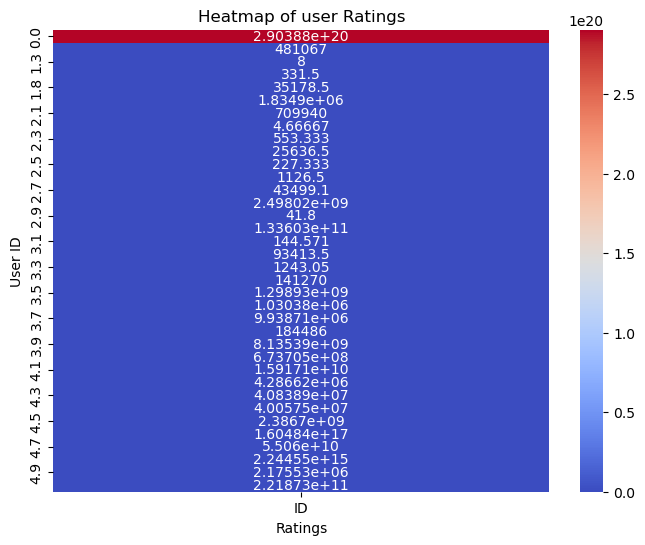

In [38]:
# Pivot the DataFrame to create a heatmap-friendly structure
heatmap_data = data.pivot_table('ID', 'Rating')

# Create the heatmap visualization
plt.figure(figsize=(8,6))  # Set the figure size for better readability
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='coolwarm', cbar=True)  # Plot the heatmap
plt.title('Heatmap of user Ratings')  # Title for the heatmap
plt.xlabel('Ratings')  # Label for the x-axis
plt.ylabel('User ID')  # Label for the y-axis
plt.show()  # Display the plot


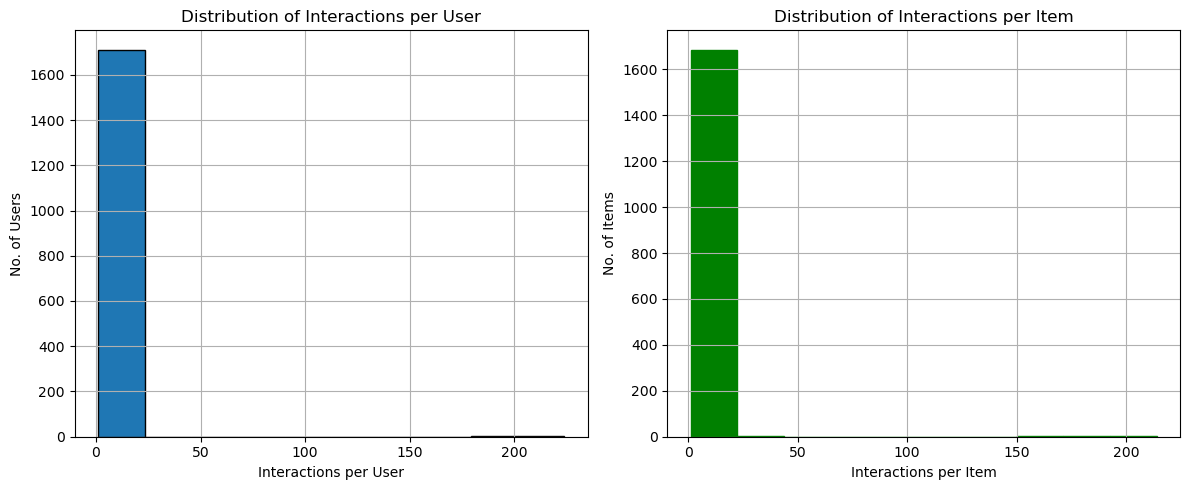

In [40]:
# Distribution of interactions
# Create a figure with a size of 12x5 inches
plt.figure(figsize=(12,5))

# First subplot: Distribution of interactions per user
plt.subplot(1, 2, 1)  # Defines a grid of 1 row, 2 columns, and this is the first subplot
data['ID'].value_counts().hist(bins=10, edgecolor='k')  # Plot histogram of interactions per user
plt.xlabel('Interactions per User')  # Label for the x-axis
plt.ylabel('No. of Users')  # Label for the y-axis
plt.title('Distribution of Interactions per User')  # Title for the first subplot

# Second subplot: Distribution of interactions per item
plt.subplot(1, 2, 2)  # Second subplot in the same grid
data['ProdID'].value_counts().hist(bins=10, edgecolor='green', color='green')  # Plot histogram of interactions per item
plt.xlabel('Interactions per Item')  # Label for the x-axis
plt.ylabel('No. of Items')  # Label for the y-axis
plt.title('Distribution of Interactions per Item')  # Title for the second subplot

# Adjust layout to ensure the subplots do not overlap
plt.tight_layout()

# Display the plots
plt.show()

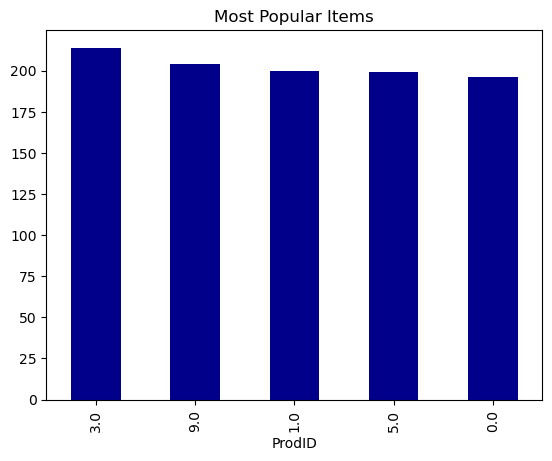

In [41]:
# Most popular items
# Get the top 5 most popular items by counting the occurrences of each 'ProdID'
popular_items = data['ProdID'].value_counts().head(5)

# Plot the top 5 most popular items as a bar chart
popular_items.plot(kind='bar', color='darkblue')

# Add a title to the plot
plt.title('Most Popular Items')

# Display the plot
plt.show()

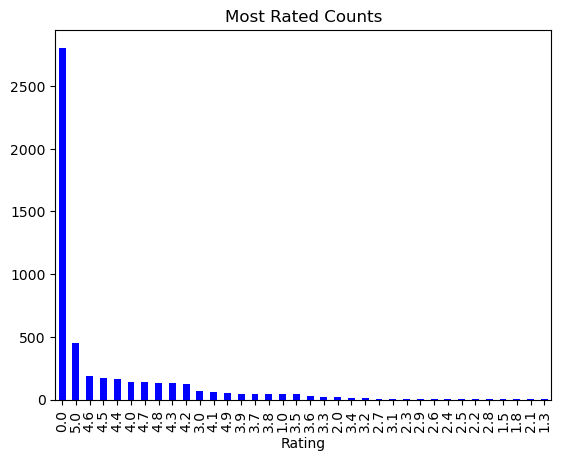

In [44]:
# Most Rated Counts
# Count the occurrences of each unique rating in the 'Rating' column and plot it as a bar chart
data['Rating'].value_counts().plot(kind='bar', color='blue')

# Add a title to the plot
plt.title('Most Rated Counts')

# Display the plot
plt.show()

# Step 4:- Data Cleaning and Tag Creations

In [47]:
import spacy # Imports the spaCy library, a popular NLP (Natural Language Processing) library.

In [49]:
nlp = spacy.load('en_core_web_sm')  # Correct model name

In [52]:
#import spacy  
from spacy.lang.en.stop_words import STOP_WORDS  # Imports the set of stop words used in the English language from spaCy.

# Loads the pre-trained spaCy model for the English language. This model is used for tokenization, part-of-speech tagging, named entity recognition, and other NLP tasks.
#nlp = spacy.load('en.core.web.sm')

def clean_and_extract_tags(text):
    doc = nlp(text.lower())  # Convert the text to lowercase and process it using spaCy
    # Use list comprehension to extract tokens that are alphanumeric and not stop words
    tags = [token.text for token in doc if token.text.isalnum() and token.text not in STOP_WORDS]
    return ', '.join(tags)  # Join the list of tags into a single string separated by commas

# List of columns from which tags will be extracted
column_to_extract_tags_from = ['Category', 'Brand', 'Description']

# Loop through each column in the list and apply the tag extraction function
for column in column_to_extract_tags_from:
    data[column] = data[column].apply(clean_and_extract_tags)

In [58]:
#Concatenate the cleaned ths from all relevent columns
# Create a new column 'Tags' by combining text from multiple columns
data['Tags'] = data[column_to_extract_tags_from].apply(
    lambda row: ', '.join(row),  # Join the values from the selected columns with a comma
    axis=1  # Apply the function row-wise (across columns for each row)
)
data['Tags'].head(3)

0    premium, beauty, premium, makeup, premium, nai...
1    beauty, hair, care, hair, color, auburn, hair,...
2    beauty, hair, care, hair, color, permanent, ha...
Name: Tags, dtype: object

# ***Rating Based Recommendation System***

In [79]:
# Grouping by product name, brand, and review count while calculating the average rating
average_ratings = data.groupby(['Name', 'ReviewCount', 'Brand', 'ImageURL'])['Rating'].mean().reset_index()

# Sorting items by average rating in descending order
top_rated_items = average_ratings.sort_values(by='Rating', ascending=False)

# Select the top 10 highest-rated products for recommendations
rating_based_recommendations = top_rated_items.head(10)

# Display the recommendations
rating_based_recommendations

,Name,ReviewCount,Brand,ImageURL,Rating
1686,"Electric Shaver, Triple Shaving Time Electric ...",4.0,moosoo,https://i5.walmartimages.com/asr/e7dcd553-90df...,5.0
526,"Alaffia Body Lotion, Vanilla, 32 Oz",2.0,alaffia,https://i5.walmartimages.com/asr/2988c323-cb6f...,5.0
2053,"Gold Bond Ultimate Ultimate Healing Lotion, Al...",2.0,"gold, bond",https://i5.walmartimages.com/asr/34b610e7-05db...,5.0
4716,"Versace Man Eau Fraiche Eau De Toilette Spray,...",24.0,versace,https://i5.walmartimages.com/asr/edaaeed5-9da0...,5.0
2058,Goldwell StyleSign 1 Flat Marvel Straightening...,2.0,goldwell,https://i5.walmartimages.com/asr/3bf90289-6980...,5.0
3842,"Red Devil 0322 Steel Wool # 00 Very Fine, 8 Pa...",1.0,"red, devil",https://i5.walmartimages.com/asr/60bfe5ba-774c...,5.0
510,"Air Wick Plug in Starter Kit, Warmer + 1 Refil...",1.0,"air, wick",https://i5.walmartimages.com/asr/0fac65b2-c6aa...,5.0
3841,Recovery Complex Anti-Frizz Shine Serum by Bai...,4.0,"bain, de, terre",https://i5.walmartimages.com/asr/fcdb4d2e-3727...,5.0
2687,Long Aid Extra Dry Formula Curl Activator Gel ...,12.0,"long, aid",https://i5.walmartimages.com/asr/f7f29199-bfa5...,5.0
2062,"Good Sense 60-Day Air Care System, Citrus, 2 o...",1.0,diversey,https://i5.walmartimages.com/asr/025a7068-7bb1...,5.0


In [87]:
# Convert Rating to integer
rating_based_recommendations['Rating'] = rating_based_recommendations['Rating'].astype(int)

# Convert ReviewCount to integer
rating_based_recommendations['ReviewCount'] = rating_based_recommendations['ReviewCount'].astype(int)

C:\Users\Stephy Mary Mathew\AppData\Local\Temp\ipykernel_12824\553260390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_based_recommendations['Rating'] = rating_based_recommendations['Rating'].astype(int)
C:\Users\Stephy Mary Mathew\AppData\Local\Temp\ipykernel_12824\553260390.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_based_recommendations['ReviewCount'] = rating_based_recommendations['ReviewCount'].astype(int)


In [91]:
# Print the heading for the Rating-Based Recommendation System (Trending Products)
print('Rating Based Recommendation System: (Trending Products)')

# Fixing column selection by ensuring correct syntax and proper order of columns
rating_based_recommendations[['Name', 'Rating', 'ReviewCount', 'Brand', 'ImageURL']] = rating_based_recommendations[['Name', 'ReviewCount', 'Brand', 'ImageURL', 'Rating']]

# Display the final dataframe with the selected columns
rating_based_recommendations

Rating Based Recommendation System: (Trending Products)


C:\Users\Stephy Mary Mathew\AppData\Local\Temp\ipykernel_12824\2395406888.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_based_recommendations[['Name', 'Rating', 'ReviewCount', 'Brand', 'ImageURL']] = rating_based_recommendations[['Name', 'ReviewCount', 'Brand', 'ImageURL', 'Rating']]


,Name,ReviewCount,Brand,ImageURL,Rating
1686,"Electric Shaver, Triple Shaving Time Electric ...",moosoo,https://i5.walmartimages.com/asr/e7dcd553-90df...,5,4
526,"Alaffia Body Lotion, Vanilla, 32 Oz",alaffia,https://i5.walmartimages.com/asr/2988c323-cb6f...,5,2
2053,"Gold Bond Ultimate Ultimate Healing Lotion, Al...","gold, bond",https://i5.walmartimages.com/asr/34b610e7-05db...,5,2
4716,"Versace Man Eau Fraiche Eau De Toilette Spray,...",versace,https://i5.walmartimages.com/asr/edaaeed5-9da0...,5,24
2058,Goldwell StyleSign 1 Flat Marvel Straightening...,goldwell,https://i5.walmartimages.com/asr/3bf90289-6980...,5,2
3842,"Red Devil 0322 Steel Wool # 00 Very Fine, 8 Pa...","red, devil",https://i5.walmartimages.com/asr/60bfe5ba-774c...,5,1
510,"Air Wick Plug in Starter Kit, Warmer + 1 Refil...","air, wick",https://i5.walmartimages.com/asr/0fac65b2-c6aa...,5,1
3841,Recovery Complex Anti-Frizz Shine Serum by Bai...,"bain, de, terre",https://i5.walmartimages.com/asr/fcdb4d2e-3727...,5,4
2687,Long Aid Extra Dry Formula Curl Activator Gel ...,"long, aid",https://i5.walmartimages.com/asr/f7f29199-bfa5...,5,12
2062,"Good Sense 60-Day Air Care System, Citrus, 2 o...",diversey,https://i5.walmartimages.com/asr/025a7068-7bb1...,5,1


# ***Content Based Recommendation System (User Preferences or Items Similarities)***

It suggest items to users based on the attributes or features of the items and the user's previous preferences.

**Workflow**

***User Preferences (eg: liked movies) -> Extract Features (eg. genre, actors, director) -> Compare with Item Features (eg: other movie) -> Recommend Similar Items (eg: movies with similar genre,actors)***

# TF-IDF Vectorizer

TF-IDF Vectorizer (Term Frequency - Inverse Document Frequency) is a statistical measure used to evaluate the importance of a word in a document relative to a collection of documents. **It helps in transforming text data into numerical data, which is useful for ML algorithms**

**Key Concepts:-**
1. Term Frequency (TF): Measures how frequently a word appears in a document. The more frequent a word is in a document, the higher its TF value.
   
    ***TF = (No. of items term t appears in a document) / (Total No. of terms in the document)***

2. Inverse Document Frequency (IDF): Measures the importance of a word. Words that are common across all documents have lower IDF values. It helps to reduce the weight of common words like "the", "is", etc.
   
    ***IDF = Log * ((Total number of documents)/(Number of documents containing the term t))***

3. TF-IDF Score: Combines TF and IDF. A higher TF-IDF score indicates the word is important in that document but not common across documents.
   ***TF-IDF=TFXIDF***

**Workflow**

***Documents ( Text Data) -> Compute Term Frequency ( TF ) -> Compute Inverse Document Frequency (IDF) -> Calculate TF-IDF Scores -> Transform Text into Numerical Vectors***

# **Cosine Similarity**

It is a metric used to measure how similar two vectors are, regardless of their magnitude. It calculates the cosine of the angle between two non-zero vectors in a multi-dimensional space.

***Cosine Similarity = cos(θ) = A.B / ||A|| ||B||***

In [113]:
# Import TfidfVectorizer for converting text data into numerical features using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Import cosine_similarity to measure the similarity between text vectors using cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

In [115]:
data.head(2)

,ID,ProdID,Rating,ReviewCount,Category,Brand,Name,ImageURL,Description,Tags
0,1.705737e+09,2.0,0.0,0.0,"premium, beauty, premium, makeup, premium, nai...",opi,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,,"premium, beauty, premium, makeup, premium, nai..."
1,9.500000e+01,76.0,0.0,0.0,"beauty, hair, care, hair, color, auburn, hair,...",easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,"pack, 3, pack, 3, upc, 381519000201, beautiful...","beauty, hair, care, hair, color, auburn, hair,..."


In [171]:
# Initialize the TF-IDF Vectorizer and remove common English stop words
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Transform the 'Tags' column text data into a TF-IDF feature matrix
tfidf_matrix_content = tfidf_vectorizer.fit_transform(data['Tags'])

# Compute the cosine similarity matrix based on the TF-IDF feature matrix of the 'Tags' column
cosine_similarities_content = cosine_similarity(tfidf_matrix_content, tfidf_matrix_content)


In [172]:
data['Name'][0]

'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath'

In [175]:
# Define the item name for which we want to find the index in the dataset
item_name = 'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath'

# Store the index of the item with the specified name in a variable for later use
item_index = data[data['Name'] == item_name].index[0]

In [179]:
# Create a list of tuples containing item indices and their cosine similarity scores with the selected item
similar_items = list(enumerate(cosine_similarities_content[item_index]))

In [199]:
# Sort the similar items list based on similarity scores in descending order
similar_items = sorted(similar_items, key=lambda x:x[1], reverse=True)

# Select the top 9 most similar items (excluding the item itself at index 0)
top_similar_items = similar_items[1:10]

# Extract the indices of the top similar items from the sorted list
recommended_items_indics = [x[0] for x in top_similar_items]

In [203]:
data.iloc[recommended_items_indics][['Name','ReviewCount','Brand']]

,Name,ReviewCount,Brand
156,OPI Nail Lacquer Polish .5oz/15mL - This Gown ...,0.0,opi
184,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,0.0,opi
205,OPI Nail Lacquer - Dont Bossa Nova Me Around -...,0.0,opi
237,OPI Infinite Shine 2 Polish - ISL P33 - Alpaca...,5.0,opi
325,OPI Gel Polish Fall 2019 Scotland Collection G...,1.0,opi
375,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi
402,"OPI Nail Polish, Strawberry Margarita, 0.5 Fl Oz",57.0,opi
706,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi
886,OPI- Nail Lacquer-GelColor - &quotLiv&quotin t...,0.0,opi


In [212]:
#Example
item_name = 'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath'
content_based_rec = content_based_recommendations(data, item_name, top_n=8)
content_based_rec

,Name,ReviewCount,Brand,ImageURL,Rating
156,OPI Nail Lacquer Polish .5oz/15mL - This Gown ...,0.0,opi,https://i5.walmartimages.com/asr/71caed3f-5f83...,0.0
184,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,0.0,opi,https://i5.walmartimages.com/asr/2d6f5147-53a8...,0.0
205,OPI Nail Lacquer - Dont Bossa Nova Me Around -...,0.0,opi,https://i5.walmartimages.com/asr/fd1195d2-8d8d...,0.0
237,OPI Infinite Shine 2 Polish - ISL P33 - Alpaca...,5.0,opi,https://i5.walmartimages.com/asr/7426eb5c-1690...,0.0
325,OPI Gel Polish Fall 2019 Scotland Collection G...,1.0,opi,https://i5.walmartimages.com/asr/79bbbd9f-9a89...,0.0
375,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi,https://i5.walmartimages.com/asr/744e869c-3500...,5.0
402,"OPI Nail Polish, Strawberry Margarita, 0.5 Fl Oz",57.0,opi,https://i5.walmartimages.com/asr/b95676e5-96ab...,4.4
706,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi,https://i5.walmartimages.com/asr/c7ba4815-52f7...,5.0


# ***Function To Recommend Products for Content Based*** 

In [290]:
# Import TfidfVectorizer for converting text data into numerical features using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Import cosine_similarity to measure the similarity between text vectors using cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

# Define the function to generate content-based recommendations for a given item
def content_based_recommendations(data, item_name, top_n=10):
    # Check if the item exists in the dataset; return an empty DataFrame if not found
    if item_name not in data['Name'].values:
        print(f"Item '{item_name}' not found in the training data.")
        return pd.DataFrame()

    # Initialize the TF-IDF Vectorizer and exclude common English stop words
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')

    # Convert the 'Tags' column text data into a TF-IDF feature matrix
    tfidf_matrix_content = tfidf_vectorizer.fit_transform(data['Tags'])

    # Calculate the cosine similarity matrix based on the TF-IDF features
    cosine_similarities_content = cosine_similarity(tfidf_matrix_content, tfidf_matrix_content)

    # Find the index of the specified item in the dataset
    item_index = data[data['Name'] == item_name].index[0]

    # Create a list of tuples with item indices and their similarity scores
    similar_items = list(enumerate(cosine_similarities_content[item_index]))

    # Sort the items based on similarity scores in descending order
    similar_items = sorted(similar_items, key=lambda x:x[1], reverse=True)

    # Select the top 'n' most similar items, excluding the item itself
    top_similar_items = similar_items[1:top_n+1]

    # Extract the indices of the recommended items
    recommended_items_indics = [x[0] for x in top_similar_items]

    # Retrieve the details of the recommended items (Name, ReviewCount, Brand)
    recommended_items_details = data.iloc[recommended_items_indics][['Name', 'ReviewCount', 'Brand', 'ImageURL', 'Rating']]

    # Return the recommended items with their details
    return recommended_items_details

In [228]:
#Example
item_name = 'Old Spice Artisan Styling High Hold Matte Finish Molding Clay, 2.64 oz'
content_based_rec = content_based_recommendations(data, item_name, top_n=8)
content_based_rec

,Name,ReviewCount,Brand,ImageURL,Rating
339,Old Spice Wild Collection Bearglove Mens Deodo...,19.0,"old, spice",https://i5.walmartimages.com/asr/be1a76a3-88a6...,4.2
1934,Old Spice Fresher Collection Deep Sea Invisibl...,256.0,"old, spice",https://i5.walmartimages.com/asr/137049af-32ee...,4.4
1554,"Old Spice Ultra Smooth Deodorant, Fresh Start,...",504.0,"old, spice",https://i5.walmartimages.com/asr/1dea23e2-1122...,4.7
3725,Old Spice High Endurance Original Anti-Perspir...,92.0,"old, spice",https://i5.walmartimages.com/asr/a0a4af40-75b3...,3.7
1282,"($25 Value) Old Spice Hair and Body Gift Set, ...",24.0,"old, spice",https://i5.walmartimages.com/asr/14191050-a3b2...,0.0
2252,Old Spice Antiperspirant and Deodorant Invisib...,20.0,"old, spice",https://i5.walmartimages.com/asr/49b8ce0f-28f7...,0.0
552,(6 pack) Old Spice Classic Original Deodorant ...,352.0,"old, spice",https://i5.walmartimages.com/asr/fa4947ea-dffc...,0.0
477,Old Spice Yetifrost Scent Body Wash with Cooli...,78.0,"old, spice",https://i5.walmartimages.com/asr/1b3690d8-f731...,0.0


In [226]:
data['Name'][5]

'Old Spice Artisan Styling High Hold Matte Finish Molding Clay, 2.64 oz'

# ***Collaborative Filtering (User Item Similarity)***

Collaborative filtering is a technique used in recommendation systems to make predictions about a user's preferences based on the preferences of many users.

# Steps:
1. **Compute Similarity Between Users:** Use a similarity measure like cosine similarity or Pearson correlation to find users who have similar preferences.

2. **Select Neighbors:** Choose a subset of similar users (neighbors).

3. **Recommend Items:** Recommend items that the neighbors have rated highly but the target user hasn't rated yet.

In [244]:
# Create a user-item matrix where each row represents a user (ID) and each column represents a product (ProdID),
# with values being the average rating given by users to products. Missing ratings are filled with 0,
# and the ratings are converted to integers.
user_item_matrix = data.pivot_table(index='ID', columns='ProdID', values='Rating', aggfunc='mean').fillna(0).astype(int)

# Display the user-item matrix
user_item_matrix

ProdID,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00,7.000000e+00,8.000000e+00,9.000000e+00,...,1.007940e+42,1.007940e+42,1.008730e+42,1.030521e+42,1.030521e+42,1.030521e+42,1.076430e+42,3.002240e+42,5.002240e+42,5.005509e+42
ID,,,,,,,,,,,,,,,,,,,,,
0.000000e+00,2,1,2,1,1,0,2,1,1,1,...,0,0,0,0,0,0,5,0,0,0
1.000000e+00,1,0,2,2,0,2,3,2,0,2,...,0,4,0,0,5,0,0,0,0,0
2.000000e+00,1,1,3,1,2,1,0,2,1,1,...,0,3,0,0,0,0,0,0,0,4
3.000000e+00,1,1,1,2,0,3,1,0,0,3,...,0,0,0,0,0,0,0,0,0,0
4.000000e+00,3,0,2,1,1,1,0,2,1,3,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.967409e+13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6.094514e+14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.007694e+17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [250]:
# Calculate the cosine similarity matrix for users based on their ratings in the user-item matrix
user_similarity = cosine_similarity(user_item_matrix)

# Display the user similarity
user_similarity

array([[1.        , 0.08328508, 0.08776176, ..., 0.        , 0.03388371,
        0.        ],
       [0.08328508, 1.        , 0.09334828, ..., 0.        , 0.        ,
        0.        ],
       [0.08776176, 0.09334828, 1.        , ..., 0.        , 0.0417756 ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.03388371, 0.        , 0.0417756 , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [258]:
# Get the index position of the target user (user with ID 4) in the user-item matrix
target_user_id = 4

# Retrieve the index position of the target user (user with ID 4) in the user-item matrix
target_user_index = user_item_matrix.index.get_loc(target_user_id)

In [268]:
# Retrieve the similarity scores of all users with the target user, based on the cosine similarity matrix
user_similarities = user_similarity[target_user_index]

# Sort the similarity scores in descending order and get the indices of the most similar users (excluding the target user)
similar_user_indices = user_similarities.argsort()[::-1][1:]

# Display the indices of the most similar users
similar_user_indices

array([  84, 1552,  702, ..., 1104, 1105,  860], dtype=int64)

In [278]:
# Initialize an empty list to store recommended item IDs
recommended_items = []

# Loop through each similar user
for user_index in similar_user_indices:
    # Get the ratings given by the similar user
    rated_by_similar_user = user_item_matrix.iloc[user_index]

    # Identify products not rated by both the similar user and the target user
    not_rated_by_target_user = (rated_by_similar_user == 0) & (user_item_matrix.iloc[target_user_index] == 0)

    # Add up to 10 of these product IDs to the recommended items list
    recommended_items.extend(user_item_matrix.columns[not_rated_by_target_user][:10])

# Retrieve the details of the recommended items from the original data
recommended_item_details = data[data['ProdID'].isin(recommended_items)][['Name', 'ReviewCount', 'Brand', 'ImageURL', 'Rating']]

# Display the recommended item details
recommended_item_details

,Name,ReviewCount,Brand,ImageURL,Rating
15,Clairol Natural Instincts Demi-Permanent Hair ...,2935.0,clairol,https://i5.walmartimages.com/asr/00a6e54a-e431...,3.7
33,"DenTek Kids Fun Flossers, Removes Food & Plaqu...",3.0,dentek,https://i5.walmartimages.com/asr/de6e52eb-6e18...,0.0
61,"COVERGIRL Exhibitionist Cream Lipstick, 395 Da...",713.0,covergirl,https://i5.walmartimages.com/asr/95076ec0-ffbd...,4.3
64,Neutrogena SkinClearing Oil-Free Liquid Founda...,741.0,neutrogena,https://i5.walmartimages.com/asr/fd4d78d8-310a...,4.2
69,Design Essentials Natural Coconut & Monoi Curl...,1.0,"design, essentials",https://i5.walmartimages.com/asr/ff2dba1d-0c02...,5.0
...,...,...,...,...,...
4983,Covidien Simplicity Underpad - 7136CS - 23&quo...,0.0,covidien,https://i5.walmartimages.com/asr/2b5ce91e-7b16...,0.0
4987,2oz - Artizen Breathe Blend Essential Oil (100...,1.0,artizen,https://i5.walmartimages.com/asr/99ddd317-013e...,5.0
4990,2 Pack - Crest 3D White Brilliance Fluoride An...,43.0,crest,https://i5.walmartimages.com/asr/5758fbaf-5515...,4.7
4996,Garnier Nutrisse Nourishing Hair Color Creme (...,7484.0,garnier,https://i5.walmartimages.com/asr/24d7a837-51f8...,3.9


# ***Function That Recommend Items***

In [285]:
# Function to generate collaborative filtering recommendations for a given user
def collaborative_filtering_recommendations(data, target_user_id, top_n=10):
    # Create user-item matrix with average ratings, fill missing values with 0, and convert to int
    user_item_matrix = data.pivot_table(index='ID', columns='ProdID', values='Rating', aggfunc='mean').fillna(0).astype(int)

    # Compute cosine similarity between users
    user_similarity = cosine_similarity(user_item_matrix)

    # Get the index position of the target user
    target_user_index = user_item_matrix.index.get_loc(target_user_id)

    # Retrieve similarity scores of all users with the target user
    user_similarities = user_similarity[target_user_index]

    # Sort users based on similarity (excluding the target user)
    similar_user_indices = user_similarities.argsort()[::-1][1:]

    # Initialize list to store recommended product IDs
    recommended_items = []

    # Loop through each similar user
    for user_index in similar_user_indices:
        # Get the ratings by the similar user
        rated_by_similar_user = user_item_matrix.iloc[user_index]

        # Identify products not rated by both the similar user and the target user
        not_rated_by_target_user = (rated_by_similar_user == 0) & (user_item_matrix.iloc[target_user_index] == 0)

        # Add up to 'top_n' product IDs to the recommendation list
        recommended_items.extend(user_item_matrix.columns[not_rated_by_target_user][:top_n])

    # Fetch details of recommended products from original data
    recommended_item_details = data[data['ProdID'].isin(recommended_items)][['Name', 'ReviewCount', 'Brand', 'ImageURL', 'Rating']]

    # Return recommended product details
    return recommended_item_details

# Example usage
target_user_id = 10
top_n = 5
collaborative_filtering_rec = collaborative_filtering_recommendations(data, target_user_id, top_n)

# Display the top-N recommendations for the target user
print(f"Top {top_n} recommendations for User {target_user_id}:")
collaborative_filtering_rec.head(5)

Top 5 recommendations for User 10:


,Name,ReviewCount,Brand,ImageURL,Rating
0,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",0.0,opi,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,0.0
3,"Kokie Professional Matte Lipstick, Hot Berry, ...",0.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/25b4b467-bc61...,0.0
4,"Gillette TRAC II Plus Razor Blade Refills, Fit...",131.0,gillette,https://i5.walmartimages.com/asr/1a2ebb06-cd01...,0.0
15,Clairol Natural Instincts Demi-Permanent Hair ...,2935.0,clairol,https://i5.walmartimages.com/asr/00a6e54a-e431...,3.7
24,Hempz Milk & Honey Herbal Body Moisturizer 2.2...,7.0,hempz,https://i5.walmartimages.com/asr/83e236e5-392c...,0.0


# ***Hybrid Recommendation Systems***

It combine two or more recommendation techniques to leverage the strength of each and mitigate their weaknesses. It is a combination of both **content based filtering** and **collaborative filtering**. 

In [295]:
# Hybrid recommendations (combine content-based and collaborative filtering)
def hybrid_recommendations(data, target_user_id, item_name, top_n=10):
    # Get content-based recommendations based on the selected item
    content_based_rec = content_based_recommendations(data, item_name, top_n)

    # Get collaborative filtering recommendations based on the target user
    collaborative_filtering_rec = collaborative_filtering_recommendations(data, target_user_id, top_n)

    # Combine both recommendation lists and remove duplicate entries
    hybrid_rec = pd.concat([content_based_rec, collaborative_filtering_rec]).drop_duplicates()

    # Return the top N hybrid recommendations
    return hybrid_rec.head(10)

In [297]:
#Example: Get hybrid recommendations for a specific user and item
target_user_id = 4 #change this to the user_id if you wanu recommendations for
item_name = "OPI Nail Lacquer Polish .5oz/15mL - This Gown Needs A Crown NL U11" #change these to the item name
hybrid_rec = hybrid_recommendations(data, target_user_id, item_name, top_n=10)

print(f"Top 10 Hybrid Recommendations for User {target_user_id} and Item '{item_name}':")
hybrid_rec

Top 10 Hybrid Recommendations for User 4 and Item 'OPI Nail Lacquer Polish .5oz/15mL - This Gown Needs A Crown NL U11':


,Name,ReviewCount,Brand,ImageURL,Rating
156,OPI Nail Lacquer Polish .5oz/15mL - This Gown ...,0.0,opi,https://i5.walmartimages.com/asr/71caed3f-5f83...,0.0
184,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,0.0,opi,https://i5.walmartimages.com/asr/2d6f5147-53a8...,0.0
205,OPI Nail Lacquer - Dont Bossa Nova Me Around -...,0.0,opi,https://i5.walmartimages.com/asr/fd1195d2-8d8d...,0.0
237,OPI Infinite Shine 2 Polish - ISL P33 - Alpaca...,5.0,opi,https://i5.walmartimages.com/asr/7426eb5c-1690...,0.0
325,OPI Gel Polish Fall 2019 Scotland Collection G...,1.0,opi,https://i5.walmartimages.com/asr/79bbbd9f-9a89...,0.0
375,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi,https://i5.walmartimages.com/asr/744e869c-3500...,5.0
402,"OPI Nail Polish, Strawberry Margarita, 0.5 Fl Oz",57.0,opi,https://i5.walmartimages.com/asr/b95676e5-96ab...,4.4
706,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi,https://i5.walmartimages.com/asr/c7ba4815-52f7...,5.0
886,OPI- Nail Lacquer-GelColor - &quotLiv&quotin t...,0.0,opi,https://i5.walmartimages.com/asr/98b4194c-e026...,0.0
1042,"OPI GelColor Gel Nail Polish, Dulce De Leche, ...",1.0,opi,https://i5.walmartimages.com/asr/c1b2c370-b2d2...,0.0


In [299]:
#Example: Get hybrid recommendations for a specific user and item
target_user_id = 10 #change this to the user_id if you wanu recommendations for
item_name = "Black Radiance Perfect Tone Matte Lip Crème, Succulent Plum" #change these to the item name
hybrid_rec = hybrid_recommendations(data, target_user_id, item_name, top_n=10)

print(f"Top 10 Hybrid Recommendations for User {target_user_id} and Item '{item_name}':")
hybrid_rec

Top 10 Hybrid Recommendations for User 10 and Item 'Black Radiance Perfect Tone Matte Lip Crème, Succulent Plum':


,Name,ReviewCount,Brand,ImageURL,Rating
896,"Black Radiance Perfect Tone Lip Color, Vintage...",78.0,"black, radiance",https://i5.walmartimages.com/asr/485f26b4-a19a...,4.7
2496,"Black Radiance Perfect Tone Lip Color, Hollywo...",18.0,"black, radiance",https://i5.walmartimages.com/asr/fe3da48f-5142...,4.3
3,"Kokie Professional Matte Lipstick, Hot Berry, ...",0.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/25b4b467-bc61...,0.0
3406,"Kokie Professional Matte Lipstick, Firecracker...",0.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/8312221b-ed22...,0.0
2406,"L.A. Colors Matte Lipstick, Tender Matte",3.0,colors,https://i5.walmartimages.com/asr/271264fb-e8c3...,3.7
4050,Kokie Professional Lip Poudre Liquid Matte Liq...,7.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/fdd7498c-319f...,3.4
2873,Kokie Professional Lip Poudre Liquid Matte Liq...,7.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/31c99d9b-ea11...,3.4
4872,"L.A. Colors Matte Lipstick, Torrid Matte",8.0,colors,https://i5.walmartimages.com/asr/62d6d9fa-eee1...,4.8
1300,"e.l.f. Liquid Matte Lipstick, Tea Rose",476.0,cosmetics,https://i5.walmartimages.com/asr/58220de4-3875...,4.1
420,Black Opal Color Splurge Sassy Luxe Matte Lips...,0.0,"black, opal",https://i5.walmartimages.com/asr/a991241b-e4ad...,0.0
